In [1]:
import numpy as np
import pandas as pd
import os
import logging
import warnings

# suppress infos from pypsa
logger = logging.getLogger("pypsa")
logger.setLevel(logging.ERROR)

# suppress warnings
# disable for development
warnings.filterwarnings("ignore")

from datetime import timedelta
from pathlib import Path
from edisgo.edisgo import import_edisgo_from_files

In [2]:
data_dir = Path(r"\\192.168.10.221\Daten_flexibel_02\simbev_results")

sub_dir = r"eDisGo_curtailment_results"

scenarios = [
    "NEP_C_2035",
    "Electrification_2050",
    "Electrification_2050_sensitivity_low_work",
]

grid_ids = ["176"]#["2534", "177", "1056", "1690", "1811", "176"]

strategies = ["dumb", "grouped", "reduced", "residual"]

data_dirs = [
    Path(os.path.join(data_dir, sub_dir, scenario, grid_id, strategy))
    for grid_id in grid_ids for scenario in scenarios for strategy in strategies
]

In [3]:
df_residual = pd.DataFrame(
    index=[*range(8760*4)]
)

for count, d in enumerate(data_dirs):
    edisgo = import_edisgo_from_files(
        directory=d,
        import_topology=False,
        import_timeseries=True,
        import_results=False,
    )
    
    string = d.parts[-2] + "_" + d.parts[-3] + "_" + d.parts[-1] 
    
    df_residual[string] = edisgo.timeseries.residual_load.multiply(-1).sort_values(ascending=False).tolist()
    
    print(count+1, "/", len(data_dirs))
    
    df_residual.to_csv("sorted_residual_load_{}.csv".format(d.parts[-2]))
    
    del edisgo
    

1 / 12
2 / 12
3 / 12
4 / 12
5 / 12
6 / 12
7 / 12
8 / 12
9 / 12
10 / 12
11 / 12
12 / 12


<AxesSubplot:>

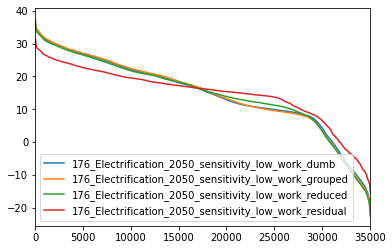

In [10]:
df_residual.iloc[:, 8:12].plot.line()